In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import bartlett
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [12]:
data = pd.read_csv("../data/profiles-v3.csv")
# data.head(1)

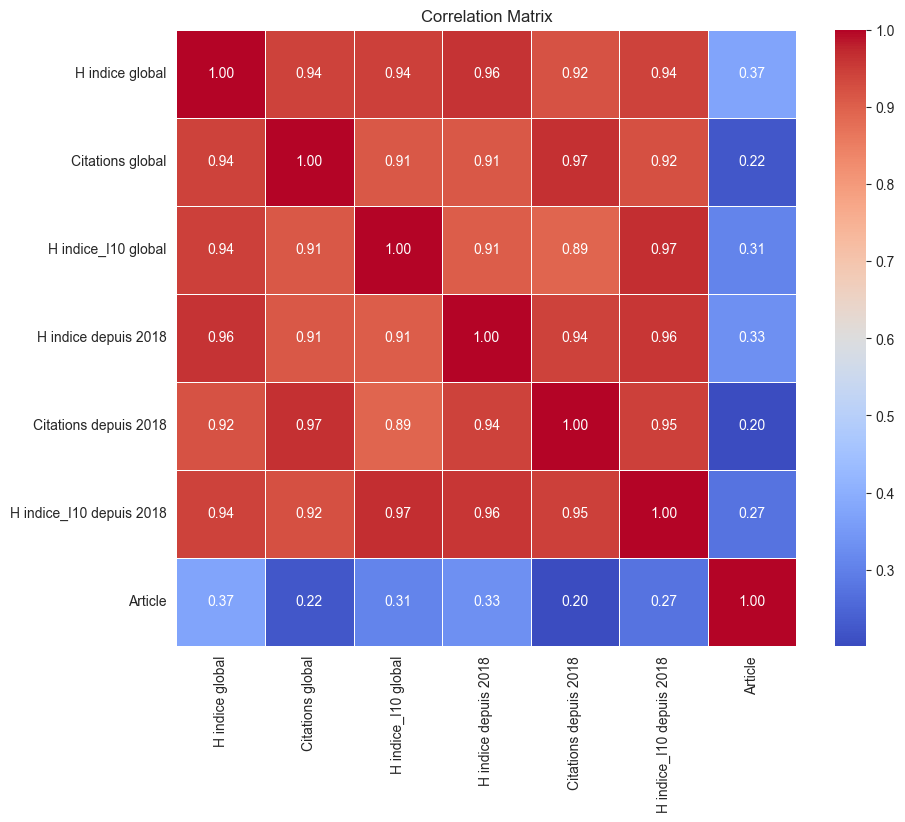

In [13]:
# Select only the numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Chaque entrée dans la matrice de corrélation représente le coefficient de corrélation entre deux variables. Le coefficient de corrélation est une mesure statistique qui quantifie le degré selon lequel deux variables évoluent l'une par rapport à l'autre. Il varie de -1 à 1, où :

- 1 indique une corrélation positive parfaite (quand une variable augmente, l'autre variable augmente également proportionnellement),
- -1 indique une corrélation négative parfaite (quand une variable augmente, l'autre variable diminue proportionnellement),
- 0 indique aucune corrélation linéaire.

# Interprétation:
- Après avoir examiné la matrice de corrélation, on peut conclure qu'il existe une corrélation positive forte (> 0.90) entre les variables `Citations globales`, `H Indice global`, `H Indice_l10 global`, `Citations depuis 2018`, `H Indice depuis 2018`, `H Indice_l10 depuis 2018`

C:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


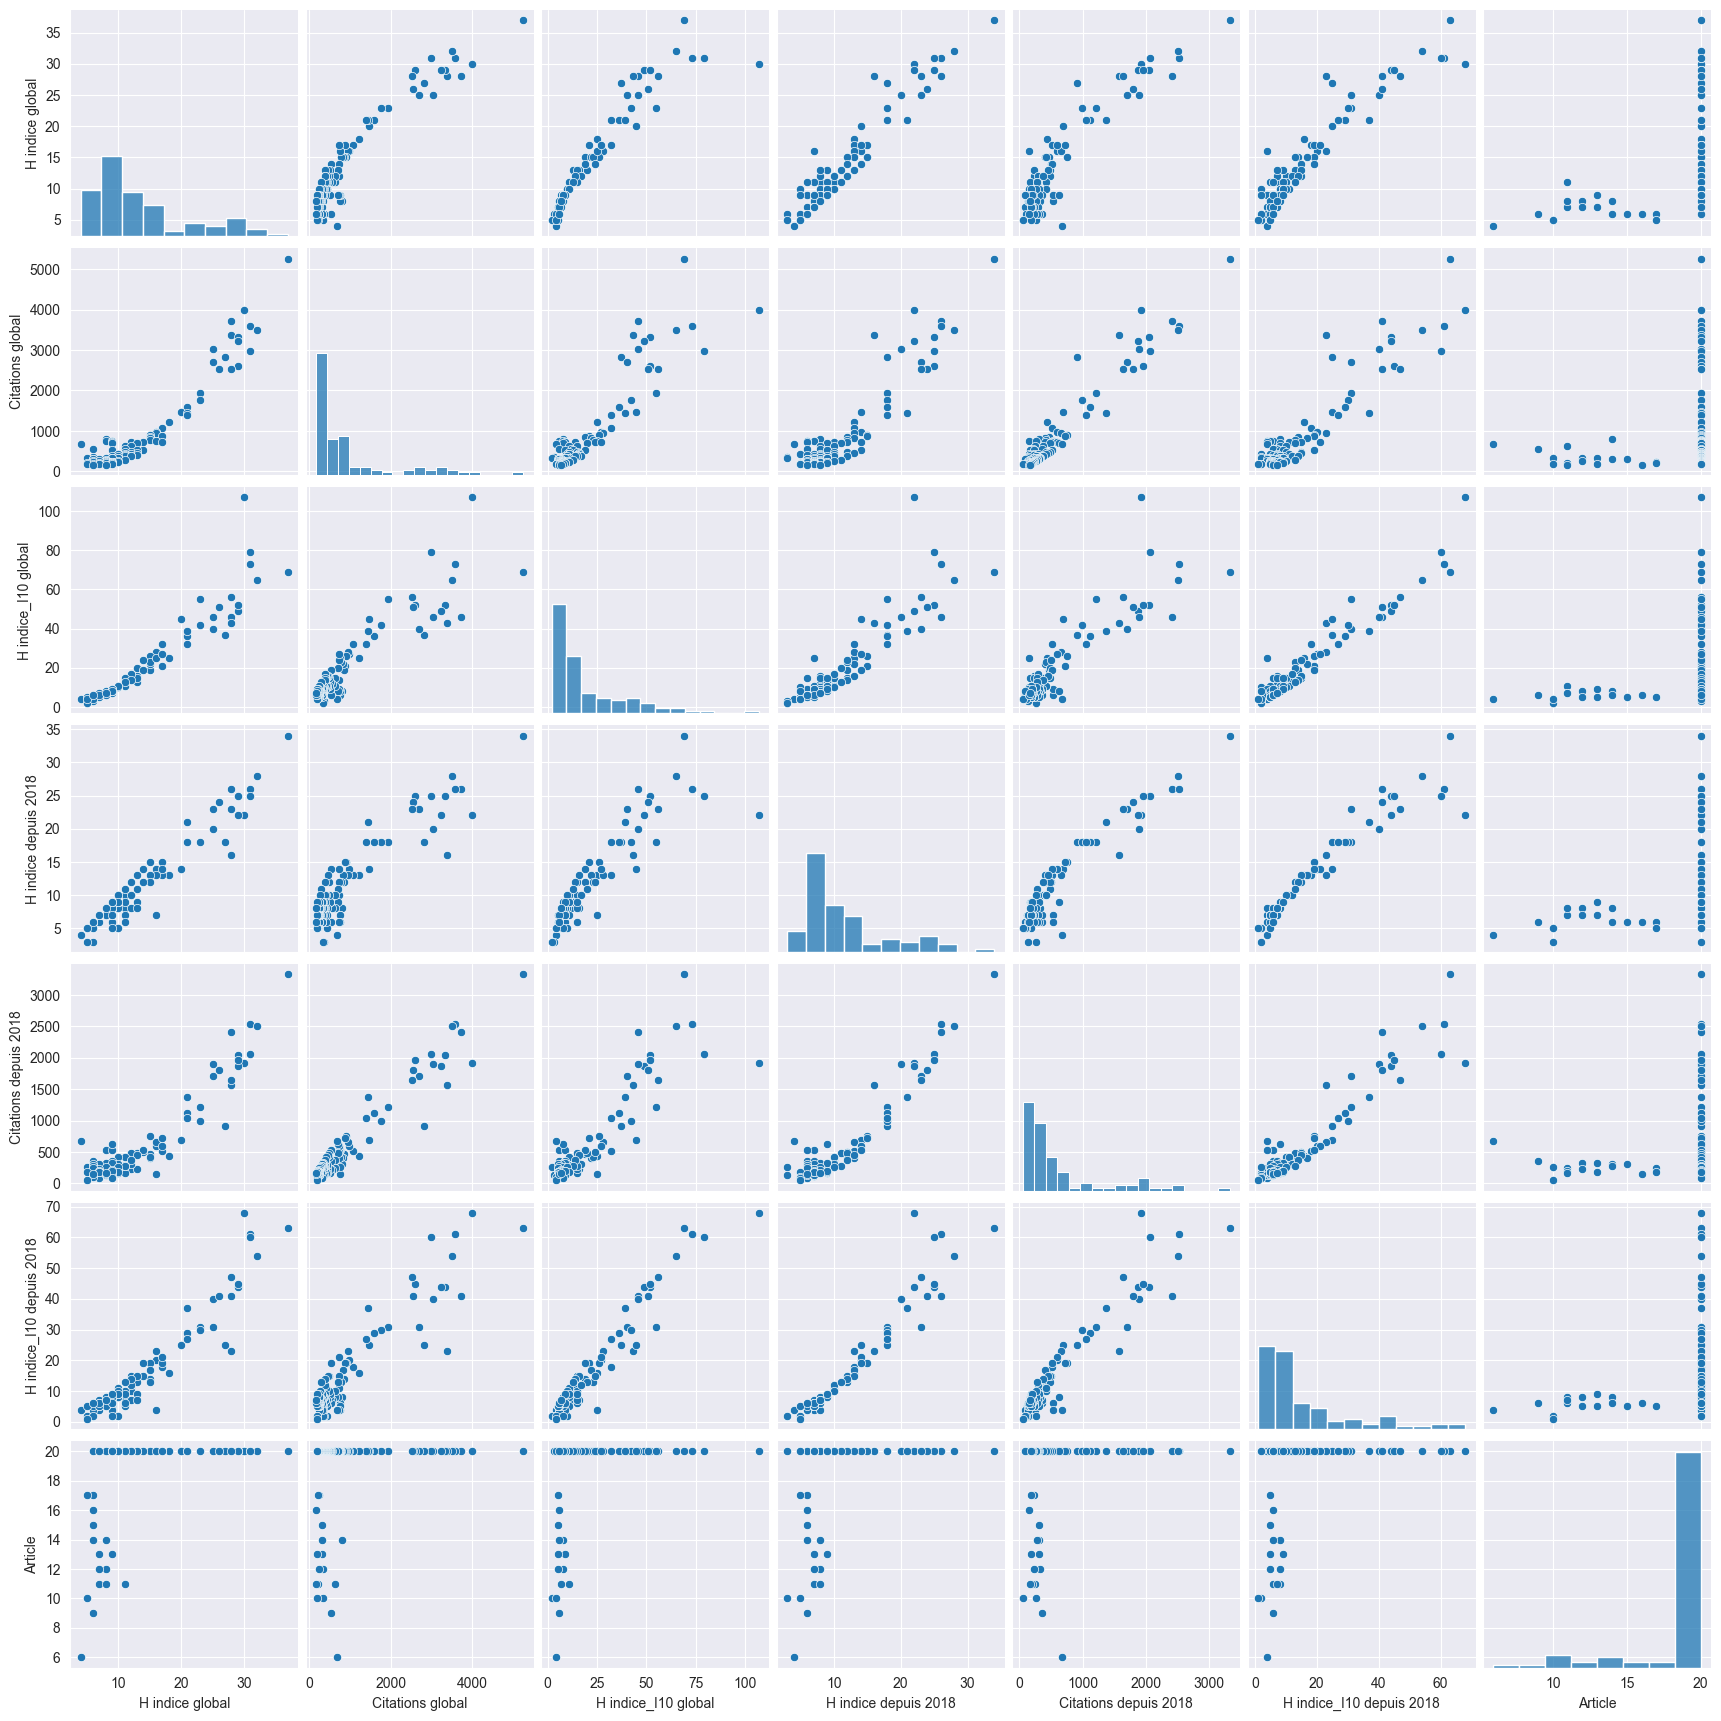

In [14]:
sns.pairplot(numeric_data)
plt.show()

# Interprétation :

- La direction et la forme des points indiquent la nature de la relation :
    - `Pente Positive` : À mesure qu'une variable augmente, l'autre a tendance à augmenter.
    - `Pente Négative` : À mesure qu'une variable augmente, l'autre a tendance à diminuer.
    - `Aucun Modèle Clair` : Il pourrait ne pas y avoir de relation linéaire forte.

- La densité et la dispersion des points dans les graphiques de dispersion indiquent la force de la relation entre les variables.
- Si les points se regroupent étroitement autour d'une ligne, cela suggère une corrélation forte.
  - par example `H Indice depuis 2018` et `H Indice global`
  - par example `H Indice_l10 depuis 2018` et `H Indice_l10 global`
- Il y a des relation non linéaire entre les variables, comme `citation global` et `H Indice global`.

In [15]:
numeric_data.head(1)

,H indice global,Citations global,H indice_I10 global,H indice depuis 2018,Citations depuis 2018,H indice_I10 depuis 2018,Article
0,37,5257,69,34,3329,63,20


In [39]:
varx = 'H indice_I10 depuis 2018'
vary = 'Citations depuis 2018'

In [51]:
# nettoyage des données
numeric_data.fillna(numeric_data.mean(), inplace = True)
X = numeric_data[varx]
y = numeric_data[vary]

Text(0.5, 1.0, 'graphe de nuage des points')

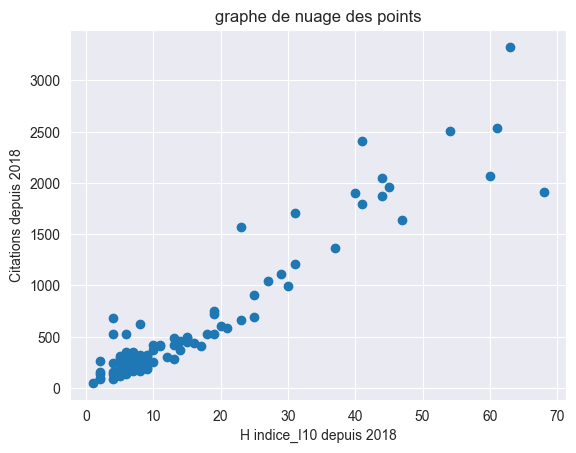

In [52]:
# Nuage de points
plt.scatter(X, y, label="Données")

# Ajouter des étiquettes et un titre
plt.xlabel(varx)
plt.ylabel(vary)
plt.title('graphe de nuage des points')

In [53]:
X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()

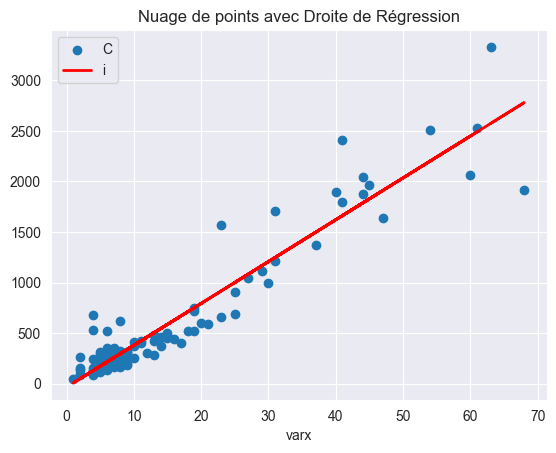

In [54]:
# Nuage de points
plt.scatter(X[varx], y, label="Données")

# Ajout de la droite de régression
plt.plot(X[varx], model1.predict(X), color='red', linewidth=2, label='Droite de régression')

plt.title("Nuage de points avec Droite de Régression")
plt.xlabel("varx")
plt.ylabel("")
plt.legend(vary)
plt.show()

In [55]:
#code ici
# Test de Durbin-Watson
dw_test = sms.stattools.durbin_watson(model1.resid)
print("Test de Durbin-Watson:", dw_test)
if dw_test > 1.5 and dw_test < 2.5:
    print("Pas d'autocorrélation positive ou négative des résidus.")
else:
    print("Autocorrélation possible des résidus.")


Test de Durbin-Watson: 2.1593748515602655
Pas d'autocorrélation positive ou négative des résidus.


In [56]:
# Test de White pour l'hétéroscédasticité
white_test_result = het_white(model1.resid, model1.model.exog)
white_test_statistic = white_test_result[0]
white_test_p_value = white_test_result[1]
if len(white_test_result) > 2:
    f_test_p_value = white_test_result[2]
else:
    f_test_p_value = None
print("Test de White - Statistique du test:", white_test_statistic)
print("Test de White - Valeur p:", white_test_p_value)
if white_test_p_value > 0.05:
    print("Pas d'hétéroscédasticité significative détectée.")
else:
    print("Hétéroscédasticité significative détectée.")


Test de White - Statistique du test: 37.072629352340435
Test de White - Valeur p: 8.90801257259146e-09
Hétéroscédasticité significative détectée.


In [57]:
# Test de normalité de Shapiro-Wilk
shapiro_test_statistic, shapiro_test_p_value = shapiro(model1.resid)
print("Test de Shapiro-Wilk - Statistique du test:", shapiro_test_statistic)
print("Test de Shapiro-Wilk - Valeur p:", shapiro_test_p_value)
if shapiro_test_p_value > 0.05:
    print("Pas de preuve significative de non-normalité des résidus.")
else:
    print("Non-normalité significative des résidus détectée.")


Test de Shapiro-Wilk - Statistique du test: 0.8702815175056458
Test de Shapiro-Wilk - Valeur p: 7.196002371756549e-08
Non-normalité significative des résidus détectée.


In [58]:
#code ici
sum = model1.summary()
sum

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Citations depuis 2018   R-squared:                       0.894
Model:                               OLS   Adj. R-squared:                  0.893
Method:                    Least Squares   F-statistic:                     828.6
Date:                   Sun, 31 Dec 2023   Prob (F-statistic):           1.32e-49
Time:                           14:45:59   Log-Likelihood:                -679.86
No. Observations:                    100   AIC:                             1364.
Df Residuals:                         98   BIC:                             1369.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -33.5835     31.232     -1.075      0.285     -95.562      28.395
H indice_I10 depuis 2018    41.3527      1.437     28.786      0.000      38.502      44.204
==============================================================================
Omnibus:                       25.177   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.476
Skew:                           0.714   Prob(JB):                     2.26e-20
Kurtosis:                       7.436   Cond. No.                         31.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

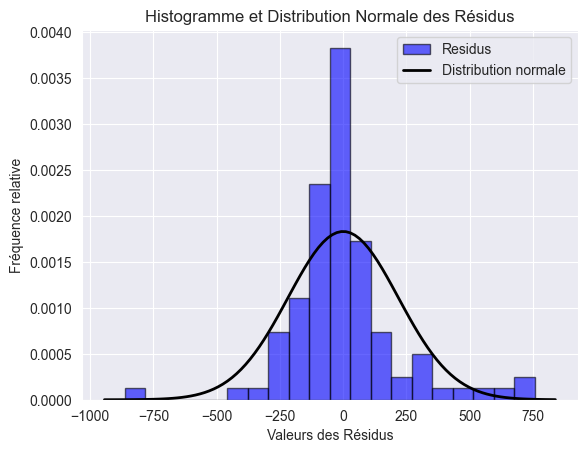

In [59]:
#code ici

# Histogramme des résidus avec courbe de distribution normale
plt.hist(model1.resid, bins=20, color='blue', edgecolor='black', density=True, alpha=0.6, label='Residus')
mu, std = model1.resid.mean(), model1.resid.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Distribution normale')
plt.title('Histogramme et Distribution Normale des Résidus')
plt.xlabel('Valeurs des Résidus')
plt.ylabel('Fréquence relative')
plt.legend()
plt.show()


In [60]:
#code ici
Y = model1.predict(X)

# Calculez l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y, Y)

# Affichez le MSE
print("l'Erreur quadratique moyenne = ", mse)


l'Erreur quadratique moyenne =  47064.875695378665


In [61]:
#code ici
Y = model1.predict(X)

# Calculez l'erreur quadratique moyenne (MSE)
r_squared = r2_score(y, Y)

# Affichez le MSE
print("Coefficient de détermination = ", r_squared)

Coefficient de détermination =  0.8942385229044054
